# Метод отжига

* Эвристический метод глобальной оптимизации
* Работает с дискретными функциями в предположении, что у близких «точек» близкое значение, и есть что-то типа градиента
* Очень простой в написании
* Никаких гарантий нет, но хорошо работает на практике
* Метод настолько мощный, что иногда им можно сдать задачи, у которых автором предполагалось адекватное решение (пример: [Ильдар Гайнуллин сдает отжигом div2E на динамику по подмножествам](http://codeforces.com/contest/745/submission/23067030))

![](https://camo.githubusercontent.com/574bf26bf301827efaa18748440fa77fab8c5a4f/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f642f64352f48696c6c5f436c696d62696e675f776974685f53696d756c617465645f416e6e65616c696e672e676966)

## Постановка задачи

Имеется некоторая функция $f(x)$, которую мы хотим минимизировать.

Наука решать эту задачу в общем случае не умеет, и вряд ли когда-либо научится.

TODO: описание алгоритма, физическая аналогия, конструирование гладких функций

При решении конкретной задачи нужно менять только функцию `fitness` и, возможно, параметры алгоритма.

## Ферзи

Рассмотрим такую задачу: дана шахматная доска $n \times n$ и $n$ ферзей. Нужно расставить их так, чтобы они не били друг друга.

Будем кодировать состояние перестановкой чисел от $1$ до $n$. Такое представление кодирует не все состояния, но оно точно не учитывает те, где ферзи бьют друг друга по вертикали или горизонтали.

Выберем такую функцию: fitness(p) = число пар ферзей, которые бьют друг друга.

Важная деталь: скорость одной итерации прямо пропорционально скорости работы `fitness`, поэтому очень важно реализовать её эффективно. Конкретно здесь её можно реализовать за $O(n^2)$ (используется в коде для наглядности), $O(n)$ и даже $O(1)$. 

Мы будем использовать `python`, потому что в нём удобнее строить графики. Эквивалентный код на C++ приведена сразу после.

In [5]:
import random

# Эти библиотеки будут нужны, чтобы рисовать графики:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [6]:
def fitness(p):
    s = 0
    for i in range(len(p)):
        d = 1
        for j in range(i):
            if abs(i-j) == abs(p[i]-p[j]): # ферзи стоят на одной диагонали
                d = 0
        s += d
    return s

Best score: 95


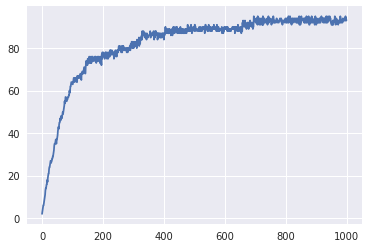

In [13]:
n = 100 # кол-во ферзей
k = 1000 # кол-во итераций
p = list(range(n)) # исходная перестановка

scores = []

t = 1
for i in range(k):
    # уменьшаем температуру
    t *= 0.99 # этот параметр лучше перебрать руками
    
    # копируем перестановку и делаем небольшое изменение
    q = p[:]
    a, b = random.sample(range(n), 2)
    q[a], q[b] = q[b], q[a]
    
    # считаем разницу fitness и решаем, нужно ли переходить в новое состояние
    d = fitness(q) - fitness(p)
    if d > 0 or random.random() < math.exp(d/t):
        p = q[:]
    scores += [fitness(q)]

print('Best score:', max(scores))
plt.plot(scores)
plt.show()

Примерно эквивалентный код на C++:

In [ ]:
const int n = 100, k = 1000;

int f(vector<int> p) {
    int s = 0;
    for (int i = 0; i < n; i++) {
        int d = 1;
        for (int j = 0; j < i; j++)
            if abs(i-j) == abs(p[i]-p[j]):
                d = 0;
        s += d;
    }
    return s;
}

double rnd() { return double(rand()) / RAND_MAX; }

int main() {

    for (int i = 0; i < n; i++)
        v[i] = i;

    int ans = 1;

    double t = 1;
    for (int i = 0; i < k; i++) {
        t *= 0.99;
        vector<int> u = v;
        swap(u[rand()%n], u[rand()%n]);
        int val = f(u);
        if (val > ans || rnd() < exp((val-ans)/t))
            v = u, ans = val;
        if (ans == n) break;
    }

    for (int x : v)
        cout << x+1 << " ";

    return 0;
}